## Download MNIST Dataset

In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")
print("Path to dataset files:", path)

/home/sohyla/depi_deployment/digits_recognition/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/sohyla/.cache/kagglehub/datasets/oddrationale/mnist-in-csv/versions/2


In [2]:

import pandas as pd
data_train = f"{path}/mnist_train.csv"
data_test = f"{path}/mnist_test.csv"

df_train = pd.read_csv(data_train)
df_test = pd.read_csv(data_test)
print("Training data shape:", df_train.shape)
print("Testing data shape:", df_test.shape)

Training data shape: (60000, 785)
Testing data shape: (10000, 785)


## Visualize the data

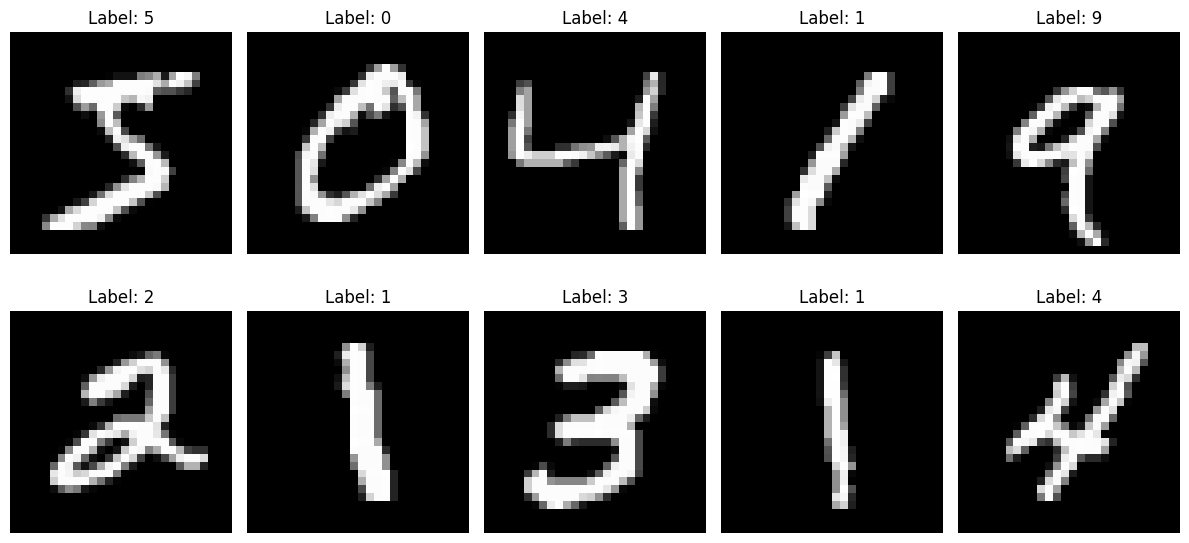

In [3]:
# Visualize the Data
import matplotlib.pyplot as plt

# Plot some samples from the training set
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(df_train.iloc[i, 1:].values.reshape(28, 28), cmap="gray")
    plt.title(f"Label: {df_train.iloc[i, 0]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [4]:
X = df_train.iloc[:, 1:].values
y = df_train.iloc[:, 0].values

## Training phase

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Training Phase
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X, y)

# Evaluation Phase
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test accuracy: 0.9669
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Save the model

In [6]:
import os
import pickle

models_dir = os.path.join("..", "models")
os.makedirs(models_dir, exist_ok=True)

# Saving the Model
model_path = os.path.join(models_dir, "random_forest_mnist_model.pkl")
with open(model_path, "wb") as f:
    pickle.dump(clf, f)
print(f"Model saved to {model_path}")

Model saved to ../models/random_forest_mnist_model.pkl


## Test the Saved model

In [7]:
rf = pickle.load(open(model_path, "rb"))

y_test_pred = rf.predict(X_test)
print("Test accuracy (loaded model):", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test accuracy (loaded model): 0.9669
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

